CS 4375 Intro to Machine Learning

**Objectives:**

* Gain experience with Keras
* Gain experience with image classification
* Gain experience with deep learning model variations and embedding

**1.**

In [9]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential,save_model, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Fashion-MNIST dataset from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


print("Train data shape: ", train_images.shape, train_labels.shape)
print("Test data shape: ", test_images.shape, test_labels.shape)


Train data shape:  (60000, 28, 28) (60000,)
Test data shape:  (10000, 28, 28) (10000,)


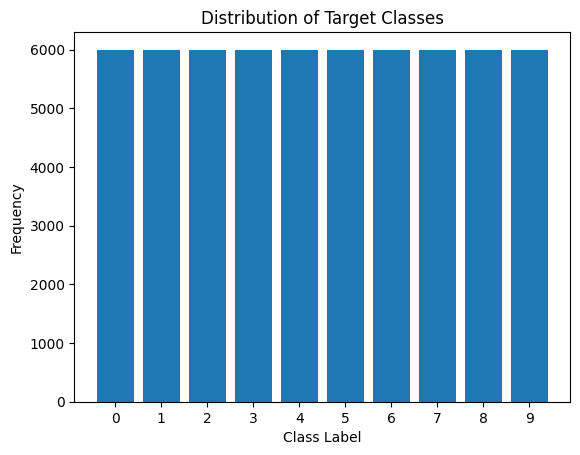

In [10]:
# Plot the distribution of target classes
plt.hist(train_labels, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10))
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Target Classes')
plt.show()


The Fashion-MNIST dataset consists of 70,000 28x28 pixel grayscale images that have been divided into 10 classes of apparel items. The dataset is designed for image classification problems, with the goal of teaching a model to correctly categorize fresh photographs of apparel items into one of the 10 groups.

The dataset is frequently used as a benchmark to assess how well deep learning and machine learning models perform in classifying images. The goal is to train a model that, using the patterns and features discovered from the training set, can correctly predict the class of a new image of apparel.

Given that the photos are low-resolution, grayscale, and may be confusing or contain noise, the process is difficult. Furthermore, some of the apparel items in the dataset, including pullovers and sweaters or sandals and shoes, are visually identical, making categorization challenging even for human observers.

The Fashion-MNIST dataset, which has gained popularity among researchers and practitioners in the field of computer vision, offers a realistic and difficult benchmark for creating and assessing picture categorization algorithms.

**2.**

In [11]:

# Preprocess the data
train_images_SQ = train_images / 255.0
test_images_SQ = test_images / 255.0

# Create a sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images_SQ, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_SQ, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5131 - accuracy: 0.8200 - val_loss: 0.4188 - val_accuracy: 0.8527
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3830 - accuracy: 0.8632 - val_loss: 0.3884 - val_accuracy: 0.8582
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3441 - accuracy: 0.8753 - val_loss: 0.3745 - val_accuracy: 0.8703
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3192 - accuracy: 0.8829 - val_loss: 0.4106 - val_accuracy: 0.8457
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2979 - accuracy: 0.8902 - val_loss: 0.3475 - val_accuracy: 0.8794
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8959 - val_loss: 0.3398 - val_accuracy: 0.8813
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.8988 - val_loss: 0.3348 - val_accuracy:

**3.**

In [12]:
# Preprocess the data
train_images_CNN = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images_CNN = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images_CNN, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_CNN, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5426 - accuracy: 0.7999 - val_loss: 0.3742 - val_accuracy: 0.8633
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3524 - accuracy: 0.8723 - val_loss: 0.3413 - val_accuracy: 0.8727
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2993 - accuracy: 0.8911 - val_loss: 0.3069 - val_accuracy: 0.8872
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2666 - accuracy: 0.9017 - val_loss: 0.2794 - val_accuracy: 0.8995
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2426 - accuracy: 0.9106 - val_loss: 0.2793 - val_accuracy: 0.8987
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2212 - accuracy: 0.9182 - val_loss: 0.2665 - val_accuracy: 0.9009
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2026 - accuracy: 0.9260 - val_loss: 0.2748 - val_accuracy:

**4.**

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.4456 - accuracy: 0.8795 - val_loss: 0.3191 - val_accuracy: 0.9009
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1776 - accuracy: 0.9411 - val_loss: 0.3040 - val_accuracy: 0.9056
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1614 - accuracy: 0.9454 - val_loss: 0.3053 - val_accuracy: 0.9034
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1496 - accuracy: 0.9486 - val_loss: 0.2971 - val_accuracy: 0.9072
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1373 - accuracy: 0.9526 - val_loss: 0.3351 - val_accuracy: 0.9007
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1351 - accuracy: 0.9531 - val_loss: 0.3223 - val_accuracy: 0.9020
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1282 - accuracy: 0.9567 - val_loss: 0.3145 - val_accuracy

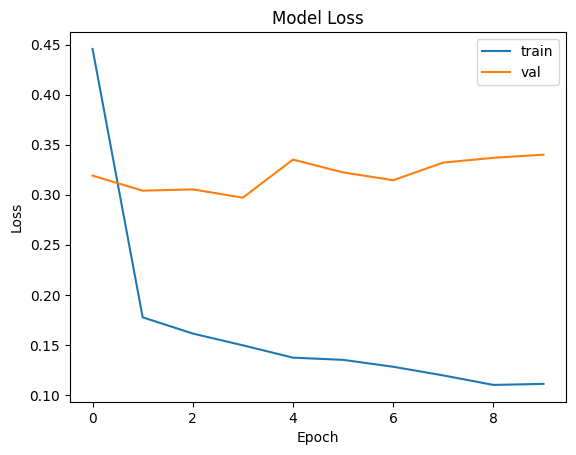

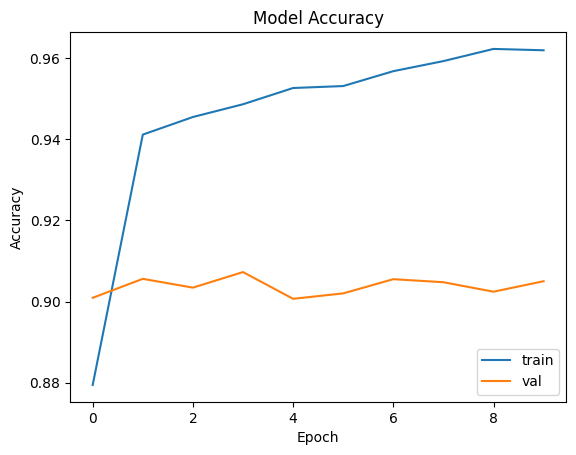

In [13]:
#Transfer learning
# Saving the initial trained model of CNN architecture
model.save('initial_model.h5')

# Loading the saved model
loaded_model = load_model('initial_model.h5')

# Adding new layers on top of the loaded model
loaded_model.add(Dense(64, activation='relu'))
loaded_model.add(Dense(10, activation='softmax'))

# Compiling the model with added layers
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with added layers
history = loaded_model.fit(train_images_CNN, train_labels, epochs=10, validation_split=0.2)


# Evaluating the model on test data
test_loss, test_acc = loaded_model.evaluate(test_images_CNN, test_labels)
print('Test accuracy:', test_acc)

# Plot the training loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

**3.**

In [8]:
# Preprocess the data
train_images_RNN = train_images.reshape(train_images.shape[0], -1, 1) / 255.0
test_images_RNN = test_images.reshape(test_images.shape[0], -1, 1) / 255.0

# Create an LSTM model
model = Sequential([
    LSTM(32, input_shape=(784, 1)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images_RNN, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_RNN, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/10
1500/1500 [==============================] - 38s 23ms/step - loss: 1.6883 - accuracy: 0.3402 - val_loss: 1.4599 - val_accuracy: 0.4314
Epoch 2/10
1500/1500 [==============================] - 37s 24ms/step - loss: 1.5004 - accuracy: 0.4061 - val_loss: 1.3448 - val_accuracy: 0.4750
Epoch 3/10
1500/1500 [==============================] - 35s 24ms/step - loss: 1.3167 - accuracy: 0.4836 - val_loss: 1.2399 - val_accuracy: 0.5099
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 1.9130 - accuracy: 0.2931 - val_loss: 1.9748 - val_accuracy: 0.2806
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 1.6778 - accuracy: 0.3556 - val_loss: 1.5389 - val_accuracy: 0.3843
Epoch 6/10
1500/1500 [==============================] - 35s 24ms/step - loss: 1.5075 - accuracy: 0.4067 - val_loss: 1.4551 - val_accuracy: 0.4358
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 1.4406 - accuracy: 0.4488 - val_loss: 1.4300 -

**5.**

**Performance Analysis:**

1. Sequential Model: The Sequential Model is a basic neural network architecture that consists of a linear stack of layers. It is simple and easy to implement, making it suitable for small-scale image classification tasks. However, it may not perform well on more complex tasks that require capturing spatial dependencies or handling large image datasets with varying sizes and resolutions.

2. Convolutional Neural Networks (CNNs): CNNs are specifically designed for image recognition tasks and can capture local patterns and spatial dependencies in images. They use convolutional layers for feature extraction and pooling layers for spatial downsampling. CNNs are more complex than Sequential Models and can learn complex hierarchical features from images, making them more suitable for larger image datasets and tasks that require high accuracy.

3. Recurrent Neural Networks (RNNs): RNNs are designed to handle sequential data, making them suitable for tasks that require capturing temporal dependencies, such as time-series data or text data. RNNs have a feedback loop that allows them to remember previous states, making them capable of modeling long-term dependencies. However, RNNs may suffer from the vanishing gradient problem and may not perform well on image classification tasks compared to CNNs.

4. Transfer Learning: Transfer Learning is a technique that allows pre-trained models, usually trained on large datasets, to be used as a starting point for a new task with limited data. Transfer Learning can save training time and improve performance, especially when the new task has limited data. By leveraging features learned from pre-trained models, Transfer Learning can achieve good performance with smaller datasets compared to training from scratch. It is particularly useful in scenarios where you don't have access to large amounts of labeled data.**bold text**